# RTF Model for predicting racket type using P1, P2 and P3, based on peaks features - Sound

### Model Description

This notebook implements a Random Tree Forest (RTF) model to predict the type of a racket (RB, RO, RR, RV) based on sound features extracted from audio files. The workflow involves reading `.wav` files, extracting frequency peaks using FFT, and training the model using these features. The model's performance is evaluated using accuracy metrics and visualized through scatter plots and confusion matrices.

### Import libraries

In [2]:
import os
import sys
import glob
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from scipy.io import wavfile
from scipy.fft import fft
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

### Import Tools Functions

In [3]:
# Reach the project root
notebook_path = os.path.abspath('')
project_root = os.path.abspath(os.path.join(notebook_path, '../../../'))
functions_path = os.path.join(project_root, 'Functions')

# Add Functions folder
if functions_path not in sys.path:
    sys.path.append(functions_path)

In [ ]:
# Import functions

from readWavFolder import readWavFolder
from spectrumFromWav import spectrumFromWav

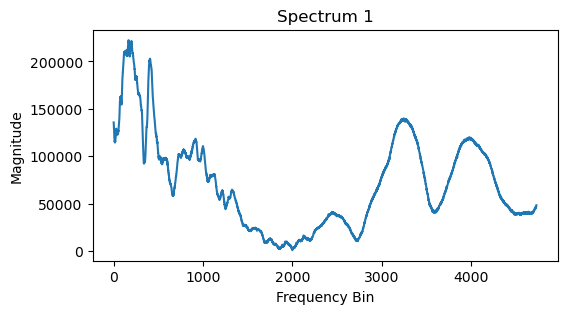

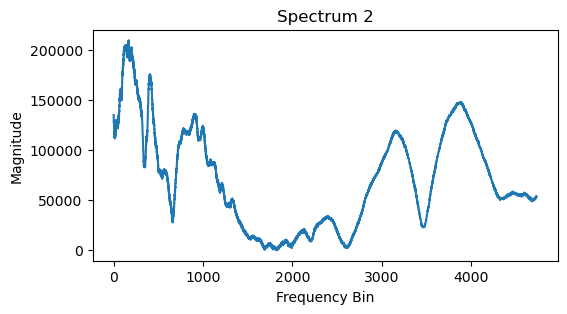

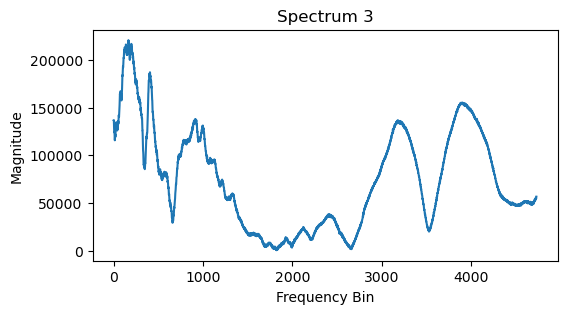

In [ ]:
def spectrumFromWav(wavFile,sampleRate,chanel):
    spectrum = fft(wavFile[:, chanel])  # Compute the FFT for the first channel
    return abs(spectrum[:len(spectrum) // 2])  # Return the magnitude of the spectrum (half due to symmetry)


spectrumVect=[]
for i in range(len(testWavFileVect)):
    spectrum = spectrumFromWav(testWavFileVect[i], samplerateVect[i],0)
    freqs = np.fft.fftfreq(len(spectrum) * 2, d=1/samplerateVect[i])[:len(spectrum)]
    filtered_spectrum = spectrum[(freqs >= 150) & (freqs <= 1000)]
    spectrumVect.append(filtered_spectrum)

for idx, spectrum in enumerate(spectrumVect[:3]):
    plt.figure(figsize=(6, 3))
    plt.plot(spectrum)
    plt.title(f"Spectrum {idx + 1}")
    plt.xlabel("Frequency Bin")
    plt.ylabel("Magnitude")
    plt.show()

['P1_RB_1_C_1.wav', 'P1_RB_1_C_2.wav', 'P1_RB_1_C_3.wav', 'P1_RB_1_S_1.wav', 'P1_RB_1_S_2.wav', 'P1_RB_1_S_3.wav', 'P1_RB_1_V_1.wav', 'P1_RB_1_V_2.wav', 'P1_RB_1_V_3.wav', 'P1_RB_2_C_1.wav', 'P1_RB_2_C_2.wav', 'P1_RB_2_C_3.wav', 'P1_RB_2_S_1.wav', 'P1_RB_2_S_2.wav', 'P1_RB_2_S_3.wav', 'P1_RB_2_V_1.wav', 'P1_RB_2_V_2.wav', 'P1_RB_2_V_3.wav', 'P1_RB_3_C_1.wav', 'P1_RB_3_C_2.wav', 'P1_RB_3_C_3.wav', 'P1_RB_3_S_1.wav', 'P1_RB_3_S_2.wav', 'P1_RB_3_S_3.wav', 'P1_RB_3_V_1.wav', 'P1_RB_3_V_2.wav', 'P1_RB_3_V_3.wav', 'P1_RB_4_C_1.wav', 'P1_RB_4_C_2.wav', 'P1_RB_4_C_3.wav', 'P1_RB_4_S_1.wav', 'P1_RB_4_S_2.wav', 'P1_RB_4_S_3.wav', 'P1_RB_4_V_1.wav', 'P1_RB_4_V_2.wav', 'P1_RB_4_V_3.wav', 'P1_RB_5_C_1.wav', 'P1_RB_5_C_2.wav', 'P1_RB_5_C_3.wav', 'P1_RB_5_S_1.wav', 'P1_RB_5_S_2.wav', 'P1_RB_5_S_3.wav', 'P1_RB_5_V_1.wav', 'P1_RB_5_V_2.wav', 'P1_RB_5_V_3.wav', 'P1_RB_6_C_1.wav', 'P1_RB_6_C_2.wav', 'P1_RB_6_C_3.wav', 'P1_RB_6_S_1.wav', 'P1_RB_6_S_2.wav', 'P1_RB_6_S_3.wav', 'P1_RB_6_V_1.wav', 'P1_RB_6_V_

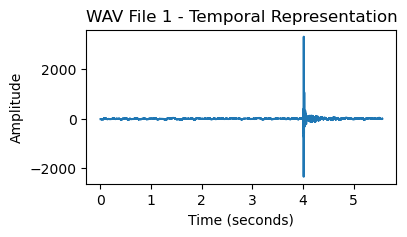

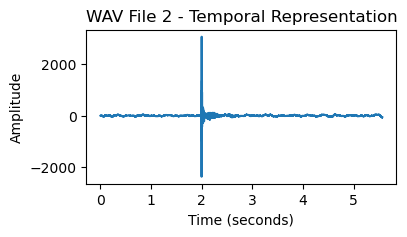

In [7]:
samplerateVect,testWavFileVect,filename = readWavFolder("../../../Data/Sound/P1")
print(filename)

for i, wav_data in enumerate(testWavFileVect[:2]):
    plt.figure(figsize=(4, 2))
    time_axis = [x / samplerateVect[i] for x in range(len(wav_data))]
    plt.plot(time_axis, wav_data[:, 0])  # Plot only the first channel
    plt.title(f"WAV File {i + 1} - Temporal Representation")
    plt.xlabel("Time (seconds)")
    plt.ylabel("Amplitude")
    plt.show()


Spectrum

Extract each peak and store

In [ ]:
def extractNPeak(n_peak,signal):
    # Find peaks in the signal
    peaks = np.argsort(signal)[-n_peak:]  # Get indices of the n largest peaks
    peaks = np.sort(peaks)  # Sort the indices in ascending order

    # Extract the peak values
    peak_values = signal[peaks]

    return peaks, peak_values

extractNPeak(20,spectrumVect[0])

# Fonction pour lire les fichiers d'un dossier donné
def lire_fichiers_dossier(dossier):
    if os.path.exists(dossier):  # Vérifier si le dossier existe
        return readWavFolder(dossier)
    else:
        print(f"Dossier introuvable : {dossier}")
        return [], [], []  # Retourne des listes vides si le dossier n'existe pas


## Main

In [ ]:
# Liste des types de raquettes
raquetteTypeList = {"RB": 0, "RO": 1, "RR": 2, "RV": 3}

# Liste pour stocker les résultats
results = []
for chanel in range(1, 3):
    if chanel == 1:
        c = 0
    else:
        c = 1
    print("Chanel", c)

    for i in range(1, 21):
        used = False
        n_peak = i * 5
        X_peaksHz = []
        X_peaksAmplitude = []
        Y_Label = []
        print("Nbr_peak", n_peak)

        # Lire les fichiers des raquettes
        for raquetteType in raquetteTypeList:
            dossier_raquette = f"./Database/P1/new_{raquetteType}"
            samplerateVect, WavFileVect, filesName = lire_fichiers_dossier(dossier_raquette)

            # Lire aussi les fichiers de condition_fixe/P2 et condition_fixe/P3
            if used == False:
                for condition in ["P2", "P3"]:
                    dossier_condition = f"./Database/Free_Condition/{condition}"
                    samplerateC, WavFileC, filesNameC = lire_fichiers_dossier(dossier_condition)

                    # Ajouter ces fichiers aux vecteurs principaux
                    samplerateVect.extend(samplerateC)
                    WavFileVect.extend(WavFileC)
                    filesName.extend(filesNameC)
                    used = True

            spectrumVect = []

            # Pour chaque fichier wav on extrait son spectre et on le filtre entre 150 et 1000hz et on prend les n meilleurs peaks
            for i in range(len(WavFileVect)):
                if "C" in filesName[i]:
                    if condition == 'P2' or 'P3':
                        if 'RB' in filesName[i]:
                            raquetteType = 'RB'
                        elif 'RR' in filesName[i]:
                            raquetteType = 'RR'
                        elif 'RO' in filesName[i]:
                            raquetteType = 'RO'
                        elif 'RV' in filesName[i]:
                            raquetteType = 'RV'

                    spectrum = spectrumFromWav(WavFileVect[i], samplerateVect[i], c)
                    freqs = np.fft.fftfreq(len(spectrum) * 2, d=1 / samplerateVect[i])[:len(spectrum)]
                    filtered_spectrum = spectrum[(freqs >= 150) & (freqs <= 1000)]
                    spectrumVect.append(filtered_spectrum)  # Ajout dans spectrumVect

                    # Utilisation du dernier élément ajouté
                    peaks, peak_values = extractNPeak(n_peak, spectrumVect[-1])

                    X_peaksHz.append(peaks)
                    X_peaksAmplitude.append(peak_values)

                    Y_Label.append(raquetteType)

        # On normalise les amplitudes
        X_peaksAmplitude = [peak_values / np.max(peak_values) for peak_values in X_peaksAmplitude]

        # Ensure all arrays in X_peaksHz and X_peaksAmplitude have the same length
        max_length = max(max(len(peaks) for peaks in X_peaksHz), max(len(amps) for amps in X_peaksAmplitude))
        X_peaksHz_padded = [np.pad(peaks, (0, max_length - len(peaks)), constant_values=0) for peaks in X_peaksHz]
        X_peaksAmplitude_padded = [np.pad(amps, (0, max_length - len(amps)), constant_values=0) for amps in X_peaksAmplitude]

        # Combine the frequencies and amplitudes into a single feature matrix
        X = np.hstack((np.array(X_peaksHz_padded), np.array(X_peaksAmplitude_padded)))

        # Encode string labels into integers
        label_encoder = LabelEncoder()
        y = label_encoder.fit_transform(Y_Label)

        # Diviser les données en ensembles d'entraînement et de test
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None, shuffle=True)

        # Paramètres de l'algorithme Random Forest
        n_estimators_range = range(10, 101, 10)  # Nombre d'arbres entre 10 et 100
        max_depth_range = [None, 10, 20, 30, 40]  # Profondeurs différentes
        min_samples_split_range = [2, 5, 10]  # Nombre minimum pour diviser un nœud
        min_samples_leaf_range = [1, 2, 4]  # Nombre minimum d'échantillons dans une feuille
        max_features_range = ['sqrt', 'log2', None]  # Nombre de features par arbre

        # Tester toutes les combinaisons d'hyperparamètres
        for n_estimators in n_estimators_range:
            for max_depth in max_depth_range:
                for min_samples_split in min_samples_split_range:
                    # Créer et entraîner le modèle Random Forest
                    rf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth,
                                                min_samples_split=min_samples_split, random_state=42)
                    rf.fit(X_train, y_train)

                    # Évaluer sur l'ensemble de test
                    y_pred = rf.predict(X_test)
                    accuracy_test = accuracy_score(y_test, y_pred)

                    # Évaluer sur l'ensemble d'entraînement
                    y_train_pred = rf.predict(X_train)
                    accuracy_train = accuracy_score(y_train, y_train_pred)

                    # Switch case pour le canal
                    if c == 0:
                        channel_name = "Left"
                    elif c == 1:
                        channel_name = "Right"

                    # Ajouter le nom du canal aux résultats
                    results.append({
                        'Chanel_Name': channel_name,
                        'nbr_de_peak': n_peak,
                        'n_estimators': n_estimators,
                        'max_depth': max_depth,
                        'min_samples_split': min_samples_split,
                        'accuracy_train': accuracy_train,
                        'accuracy_test': accuracy_test
                    })

# Convertir les résultats en DataFrame
results_df = pd.DataFrame(results)

# Enregistrer les résultats dans un fichier Excel
results_df.to_excel("RTF_RAQUETTE_P1.P2.P3_Peaks.xlsx", index=False)

print("Results have been saved to 'results_random_forest.xlsx'.")

Chanel 0
Nbr_peak 5
Nbr_peak 10
Nbr_peak 15
Nbr_peak 20
Nbr_peak 25
Nbr_peak 30
Nbr_peak 35
Nbr_peak 40
Nbr_peak 45
Nbr_peak 50
Nbr_peak 55
Nbr_peak 60
Nbr_peak 65
Nbr_peak 70
Nbr_peak 75
Nbr_peak 80
Nbr_peak 85
Nbr_peak 90
Nbr_peak 95
Nbr_peak 100
Chanel 1
Nbr_peak 5
Nbr_peak 10
Nbr_peak 15
Nbr_peak 20
Nbr_peak 25
Nbr_peak 30
Nbr_peak 35
Nbr_peak 40
Nbr_peak 45
Nbr_peak 50
Nbr_peak 55
Nbr_peak 60
Nbr_peak 65
Nbr_peak 70
Nbr_peak 75
Nbr_peak 80
Nbr_peak 85
Nbr_peak 90
Nbr_peak 95
Nbr_peak 100
Results have been saved to 'results_random_forest.xlsx'.


Visualisation des données fournis au model

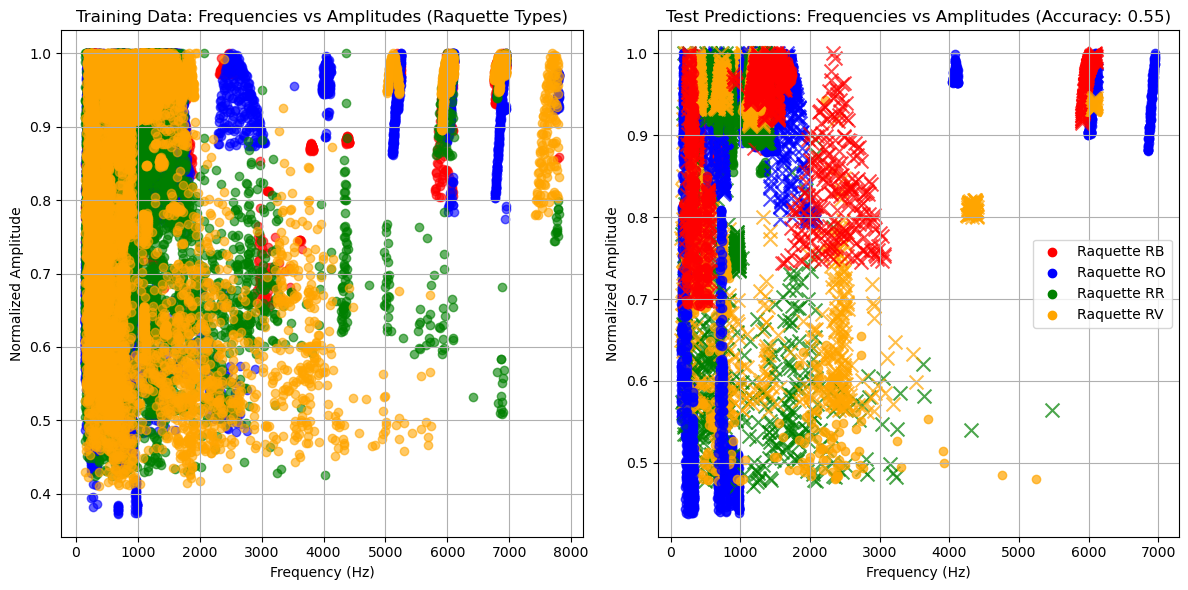

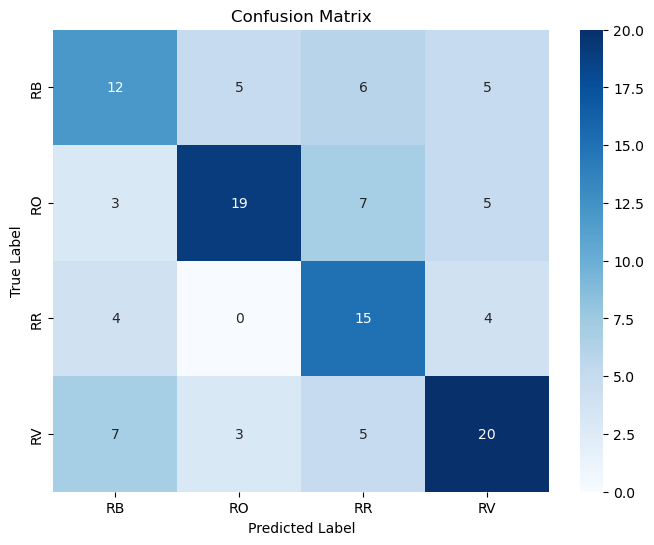

Classification Report:
              precision    recall  f1-score   support

          RB       0.46      0.43      0.44        28
          RO       0.70      0.56      0.62        34
          RR       0.45      0.65      0.54        23
          RV       0.59      0.57      0.58        35

    accuracy                           0.55       120
   macro avg       0.55      0.55      0.55       120
weighted avg       0.57      0.55      0.55       120


Best KNN Parameters:
n_neighbors: 5
weights: uniform
metric: manhattan
Test Accuracy: 0.6167


In [ ]:
# Define a color map for the labels
colors = ['red', 'blue', 'green', 'orange']  # Colors for each label: RB, RO, RR, RV
raquetteTypeList = {"RB": 0, "RO": 1, "RR": 2, "RV": 3}  # Dictionary for raquette types
label_names = list(raquetteTypeList.keys())

# Create a scatter plot for the training data
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # First subplot for training dZata
for label_idx, label_name in enumerate(label_names):
    # Filter data points for the current label
    label_data = X_train[y_train == label_idx]
    for sample in label_data:
        # Add 150Hz because of the filter
        plt.scatter(sample[:n_peak]+150, sample[n_peak:], color=colors[label_idx], alpha=0.6)

plt.title("Training Data: Frequencies vs Amplitudes (Raquette Types)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Normalized Amplitude")
plt.grid()

# Create a scatter plot for the test data with predictions
plt.subplot(1, 2, 2)  # Second subplot for test data with predictions
y_pred = knn.predict(X_test)  # Get predictions for test data

for i, sample in enumerate(X_test):
    true_label = y_test[i]
    pred_label = y_pred[i]
    
    # Plot with solid color if prediction is correct, otherwise use a different marker
    if true_label == pred_label:
        plt.scatter(sample[:n_peak]+150, sample[n_peak:], color=colors[pred_label], alpha=0.7)
    else:
        # Use 'x' marker for incorrect predictions
        plt.scatter(sample[:n_peak]+150, sample[n_peak:], color=colors[pred_label], 
                   marker='x', s=100, alpha=0.7)

# Add a legend
for label_idx, label_name in enumerate(label_names):
    plt.scatter([], [], color=colors[label_idx], label=f"Raquette {label_name}")

plt.legend()
plt.title(f"Test Predictions: Frequencies vs Amplitudes (Accuracy: {accuracy_score(y_test, y_pred):.2f})")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Normalized Amplitude")
plt.grid()

plt.tight_layout()
plt.show()

# Print confusion matrix for better understanding of model performance
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Plot confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=label_names, yticklabels=label_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_names))

# Print best hyperparameters if available
if 'results_df' in locals():
    best_params = results_df.loc[results_df['accuracy_test'].idxmax()]
    print("\nBest KNN Parameters:")
    print(f"n_neighbors: {best_params['n_neighbors']}")
    print(f"weights: {best_params['weights']}")
    print(f"metric: {best_params['metric']}")
    print(f"Test Accuracy: {best_params['accuracy_test']:.4f}")